# Stack Overflow

## Introduction 

In this assignment, we will use some posts on Stack Overflow during the year of 2015 and measure the similarity of  users by looking at their answers' score. In order to get a full grade, do not delete the output of your code cells. This assignment is to be completed **INDIVIDUALLY** and is due on **September 29**.

Please update the README with your BU username.

## Step 0. Preparation

Before we start working on the notebook, let's make sure that everything is setup properly. You should have downloaded and installed
* [Anaconda](https://store.continuum.io/cshop/anaconda/)
* [Git](http://git-scm.com/downloads)

If you are working from the undergraduate lab (on a linux machine) these are both installed, but you need to follow the instructions [from here](https://github.com/mcrovella/CS505-Computational-Tools-for-Data-Science/blob/master/2-Getting-Started.ipynb).



## Step 1. Getting the data

Let's make a sample request to retrieve some questions posted on Stack Exchange on the first day of 2015. Documentation of the Stack Exchange API can be found [here](https://api.stackexchange.com/docs). You might need to install the *requests* library and an easy way to do so is by using the command [pip](https://docs.python.org/3/installing/index.html).

In [12]:
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00

response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow")
print(response)
type(response)

<Response [200]>


requests.models.Response

Now, object *response* contains the raw text of posts from the first day of 2015. 
Note that all dates in the Stack Exchange API are in [unix epoch time](https://en.wikipedia.org/wiki/Unix_time). The format for the request string is specified [here](https://api.stackexchange.com/docs/questions).

We can try to print the response that Stack Exchange returns.

In [13]:
print(response.text)


{"items":[{"tags":["php","mysql","arrays","mysqli"],"owner":{"reputation":230,"user_id":3210431,"user_type":"registered","accept_rate":78,"profile_image":"https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1","display_name":"salep","link":"https://stackoverflow.com/users/3210431/salep"},"is_answered":true,"view_count":247,"accepted_answer_id":27727478,"answer_count":2,"score":0,"last_activity_date":1420071815,"creation_date":1420070458,"question_id":27727385,"link":"https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array","title":"Inserting multiple records into MySQL from an array"},{"tags":["apache-pig"],"owner":{"reputation":6,"user_id":868779,"user_type":"registered","profile_image":"https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r=PG","display_name":"Balpreet Pankaj","link":"https://stackoverflow.com/users/868779/balpreet-pankaj"},"is_answered":false,"view_count":920,"answer_count":1,"score":1,"last_activity_dat

It is not possible to read the raw response. Instead, we need to decode the raw response as **JSON** and use the `json` library to print it. JavaScript Object Notation (JSON) is a standard text-based format for representing structured data based on JavaScript object syntax, which is commonly used for representing and transmitting data on web sites. More documentation on json objects can be found [here](https://developer.mozilla.org/en-US/docs/Learn/JavaScript/Objects/JSON) 

In [14]:
import json

json_response = response.json()
print(json.dumps(json_response, indent=1))


{
 "items": [
  {
   "tags": [
    "php",
    "mysql",
    "arrays",
    "mysqli"
   ],
   "owner": {
    "reputation": 230,
    "user_id": 3210431,
    "user_type": "registered",
    "accept_rate": 78,
    "profile_image": "https://i.stack.imgur.com/QTjBV.jpg?s=128&g=1",
    "display_name": "salep",
    "link": "https://stackoverflow.com/users/3210431/salep"
   },
   "is_answered": true,
   "view_count": 247,
   "accepted_answer_id": 27727478,
   "answer_count": 2,
   "score": 0,
   "last_activity_date": 1420071815,
   "creation_date": 1420070458,
   "question_id": 27727385,
   "link": "https://stackoverflow.com/questions/27727385/inserting-multiple-records-into-mysql-from-an-array",
   "title": "Inserting multiple records into MySQL from an array"
  },
  {
   "tags": [
    "apache-pig"
   ],
   "owner": {
    "reputation": 6,
    "user_id": 868779,
    "user_type": "registered",
    "profile_image": "https://www.gravatar.com/avatar/19f7315b44e97ca1bc069694fdba7428?s=128&d=identicon&r

Now we can easily see that the response consists of a list of question items. For each of these items, we get information about its attributes such as its `creation_date`, `answer_count`, `owner`, `title`, etc.

Notice that has_more is true. To get more items, we can [request the next page](https://api.stackexchange.com/docs/paging).

-----------------

## Step 2. Parsing the responses

In this section, we practice some of the basic Python tools that we learned in class and the powerful string handling methods that Python offers. Our goal is to be able to pick the interesting parts of the response and transform them in a format that will be useful to us.

First let's isolate the creation_date in the response. Fill in the rest of the ```print_creation_dates_json()``` function that reads the response and prints the creation dates and whether the question was answered. Your solution should be in the form **(creation_date,is_answered)**. Notice that a JSON object is basically a dictionary. **(5 pts)**

In [5]:
def print_creation_dates_is_answered_json(response):
    """
    Prints the creation_date of all the questions in the response.
    Parameters:
        response: Response object
    """
    records = response.json()
    list = [[line["creation_date"], line["is_answered"]] for line in records["items"]]
    for i in list:
        print(datetime.fromtimestamp(i[0]).strftime('%Y-%m-%d %H:%M:%S.%f') + ", " + str(i[1]))
        

Write the code that calls the ```print_creation_dates_is_answered_json()``` function to print out all the creation dates of questions posted on the first day in 2015. Please be aware of Stack Exchange's [rate limit](https://api.stackexchange.com/docs/throttle). This means that after getting a request, you will need to wait for some seconds before making a new request. If you do not do that, stack exchange will block you from making any new requests. **(5 pts)**

In [6]:
import time
import requests
from datetime import datetime

start_time = 1420070400 # 01-01-2015 at 00:00:00
end_time   = 1420156800 # 01-02-2015 at 00:00:00
flag = True
page = 1
while (flag):
    time.sleep(0.5) # 20 requests/sec < 30 requests a second (the throttle)
    
    response = requests.get("https://api.stackexchange.com/2.2/questions?pagesize=100" +
                        "&fromdate=" + str(start_time) + "&todate=" + str(end_time) +
                        "&order=asc&sort=creation&site=stackoverflow&page=" + str(page))
    
    json_response = response.json()
    print_creation_dates_is_answered_json(response)
        
    flag = json_response["has_more"]
    if(not flag): print("Finished at page " + str(page))
    
    page += 1
    


2014-12-31 19:00:58.000000, True
2014-12-31 19:01:43.000000, False
2014-12-31 19:02:32.000000, True
2014-12-31 19:02:57.000000, True
2014-12-31 19:03:31.000000, True
2014-12-31 19:04:01.000000, False
2014-12-31 19:05:03.000000, False
2014-12-31 19:05:27.000000, True
2014-12-31 19:05:34.000000, True
2014-12-31 19:06:17.000000, False
2014-12-31 19:06:41.000000, True
2014-12-31 19:07:28.000000, True
2014-12-31 19:07:39.000000, True
2014-12-31 19:07:46.000000, False
2014-12-31 19:09:28.000000, True
2014-12-31 19:10:05.000000, False
2014-12-31 19:10:29.000000, True
2014-12-31 19:11:43.000000, True
2014-12-31 19:12:02.000000, True
2014-12-31 19:12:55.000000, True
2014-12-31 19:13:04.000000, False
2014-12-31 19:13:32.000000, False
2014-12-31 19:13:50.000000, False
2014-12-31 19:15:40.000000, True
2014-12-31 19:17:11.000000, True
2014-12-31 19:18:50.000000, True
2014-12-31 19:22:16.000000, False
2014-12-31 19:23:14.000000, True
2014-12-31 19:23:50.000000, True
2014-12-31 19:24:28.000000, False

2014-12-31 23:50:41.000000, True
2014-12-31 23:50:51.000000, True
2014-12-31 23:51:00.000000, True
2014-12-31 23:51:19.000000, True
2014-12-31 23:51:51.000000, True
2014-12-31 23:53:10.000000, True
2014-12-31 23:54:17.000000, True
2014-12-31 23:54:47.000000, True
2014-12-31 23:56:06.000000, True
2014-12-31 23:56:08.000000, True
2014-12-31 23:57:05.000000, False
2014-12-31 23:57:34.000000, False
2014-12-31 23:58:30.000000, True
2014-12-31 23:58:51.000000, True
2014-12-31 23:59:31.000000, True
2015-01-01 00:00:16.000000, True
2015-01-01 00:01:19.000000, True
2015-01-01 00:01:28.000000, True
2015-01-01 00:01:48.000000, True
2015-01-01 00:02:19.000000, True
2015-01-01 00:06:24.000000, True
2015-01-01 00:07:05.000000, False
2015-01-01 00:08:42.000000, False
2015-01-01 00:09:25.000000, False
2015-01-01 00:12:54.000000, False
2015-01-01 00:13:25.000000, True
2015-01-01 00:14:00.000000, False
2015-01-01 00:15:31.000000, True
2015-01-01 00:16:31.000000, True
2015-01-01 00:17:22.000000, False
20

2015-01-01 03:33:55.000000, True
2015-01-01 03:35:13.000000, True
2015-01-01 03:36:50.000000, True
2015-01-01 03:37:03.000000, True
2015-01-01 03:37:49.000000, False
2015-01-01 03:38:21.000000, False
2015-01-01 03:38:50.000000, True
2015-01-01 03:39:25.000000, False
2015-01-01 03:39:31.000000, False
2015-01-01 03:39:43.000000, True
2015-01-01 03:39:49.000000, True
2015-01-01 03:40:19.000000, False
2015-01-01 03:40:47.000000, False
2015-01-01 03:41:06.000000, False
2015-01-01 03:41:36.000000, True
2015-01-01 03:41:55.000000, True
2015-01-01 03:42:04.000000, False
2015-01-01 03:42:06.000000, False
2015-01-01 03:42:17.000000, False
2015-01-01 03:43:20.000000, True
2015-01-01 03:43:50.000000, True
2015-01-01 03:45:00.000000, True
2015-01-01 03:45:05.000000, False
2015-01-01 03:45:36.000000, True
2015-01-01 03:45:48.000000, True
2015-01-01 03:47:07.000000, True
2015-01-01 03:47:50.000000, False
2015-01-01 03:48:26.000000, False
2015-01-01 03:50:01.000000, False
2015-01-01 03:50:57.000000, T

2015-01-01 06:27:49.000000, True
2015-01-01 06:28:18.000000, True
2015-01-01 06:30:07.000000, True
2015-01-01 06:30:47.000000, True
2015-01-01 06:31:26.000000, True
2015-01-01 06:31:56.000000, True
2015-01-01 06:32:01.000000, True
2015-01-01 06:32:09.000000, False
2015-01-01 06:32:13.000000, True
2015-01-01 06:33:12.000000, False
2015-01-01 06:33:28.000000, False
2015-01-01 06:34:15.000000, True
2015-01-01 06:34:40.000000, False
2015-01-01 06:34:55.000000, True
2015-01-01 06:35:01.000000, True
2015-01-01 06:35:06.000000, False
2015-01-01 06:36:07.000000, False
2015-01-01 06:36:11.000000, True
2015-01-01 06:36:28.000000, False
2015-01-01 06:36:58.000000, False
2015-01-01 06:37:20.000000, True
2015-01-01 06:37:20.000000, True
2015-01-01 06:37:39.000000, True
2015-01-01 06:37:41.000000, True
2015-01-01 06:38:23.000000, False
2015-01-01 06:38:27.000000, False
2015-01-01 06:41:44.000000, True
2015-01-01 06:41:57.000000, True
2015-01-01 06:42:17.000000, True
2015-01-01 06:42:55.000000, True


2015-01-01 08:40:19.000000, True
2015-01-01 08:40:30.000000, False
2015-01-01 08:41:20.000000, True
2015-01-01 08:42:10.000000, True
2015-01-01 08:42:12.000000, False
2015-01-01 08:42:47.000000, True
2015-01-01 08:44:43.000000, True
2015-01-01 08:45:12.000000, True
2015-01-01 08:45:46.000000, False
2015-01-01 08:45:48.000000, True
2015-01-01 08:46:11.000000, False
2015-01-01 08:47:35.000000, True
2015-01-01 08:47:35.000000, True
2015-01-01 08:47:44.000000, True
2015-01-01 08:47:56.000000, True
2015-01-01 08:47:57.000000, False
2015-01-01 08:48:05.000000, False
2015-01-01 08:48:35.000000, True
2015-01-01 08:48:46.000000, True
2015-01-01 08:48:57.000000, True
2015-01-01 08:49:09.000000, True
2015-01-01 08:50:28.000000, True
2015-01-01 08:50:42.000000, True
2015-01-01 08:50:54.000000, True
2015-01-01 08:50:57.000000, True
2015-01-01 08:51:07.000000, True
2015-01-01 08:51:13.000000, True
2015-01-01 08:52:13.000000, True
2015-01-01 08:52:15.000000, True
2015-01-01 08:52:29.000000, True
2015

2015-01-01 10:51:49.000000, True
2015-01-01 10:52:20.000000, False
2015-01-01 10:52:58.000000, False
2015-01-01 10:53:05.000000, True
2015-01-01 10:53:06.000000, False
2015-01-01 10:53:19.000000, True
2015-01-01 10:54:04.000000, False
2015-01-01 10:54:23.000000, True
2015-01-01 10:55:40.000000, True
2015-01-01 10:56:54.000000, False
2015-01-01 10:57:38.000000, True
2015-01-01 10:57:39.000000, True
2015-01-01 10:57:41.000000, True
2015-01-01 10:58:20.000000, False
2015-01-01 10:58:34.000000, True
2015-01-01 10:58:35.000000, True
2015-01-01 10:58:45.000000, True
2015-01-01 10:59:00.000000, False
2015-01-01 10:59:16.000000, False
2015-01-01 10:59:30.000000, True
2015-01-01 10:59:44.000000, True
2015-01-01 10:59:49.000000, True
2015-01-01 11:00:18.000000, True
2015-01-01 11:00:42.000000, True
2015-01-01 11:00:46.000000, True
2015-01-01 11:01:47.000000, True
2015-01-01 11:02:47.000000, True
2015-01-01 11:02:58.000000, True
2015-01-01 11:03:01.000000, True
2015-01-01 11:03:12.000000, True
20

2015-01-01 13:01:09.000000, False
2015-01-01 13:01:27.000000, False
2015-01-01 13:01:31.000000, False
2015-01-01 13:01:43.000000, True
2015-01-01 13:02:04.000000, True
2015-01-01 13:02:11.000000, True
2015-01-01 13:02:18.000000, True
2015-01-01 13:03:05.000000, True
2015-01-01 13:03:55.000000, False
2015-01-01 13:04:23.000000, True
2015-01-01 13:04:45.000000, False
2015-01-01 13:04:50.000000, True
2015-01-01 13:05:41.000000, True
2015-01-01 13:05:53.000000, False
2015-01-01 13:06:01.000000, False
2015-01-01 13:06:52.000000, False
2015-01-01 13:06:56.000000, True
2015-01-01 13:07:27.000000, True
2015-01-01 13:07:54.000000, False
2015-01-01 13:08:09.000000, True
2015-01-01 13:08:12.000000, True
2015-01-01 13:08:21.000000, True
2015-01-01 13:08:22.000000, True
2015-01-01 13:08:28.000000, False
2015-01-01 13:09:24.000000, False
2015-01-01 13:11:13.000000, True
2015-01-01 13:12:05.000000, False
2015-01-01 13:12:07.000000, False
2015-01-01 13:12:44.000000, True
2015-01-01 13:13:48.000000, Tr

2015-01-01 15:00:46.000000, True
2015-01-01 15:01:51.000000, True
2015-01-01 15:01:53.000000, True
2015-01-01 15:02:09.000000, True
2015-01-01 15:02:47.000000, False
2015-01-01 15:02:51.000000, True
2015-01-01 15:03:33.000000, False
2015-01-01 15:04:20.000000, False
2015-01-01 15:04:30.000000, True
2015-01-01 15:04:46.000000, False
2015-01-01 15:04:57.000000, True
2015-01-01 15:05:49.000000, True
2015-01-01 15:06:01.000000, True
2015-01-01 15:06:16.000000, True
2015-01-01 15:06:20.000000, True
2015-01-01 15:06:22.000000, False
2015-01-01 15:06:28.000000, True
2015-01-01 15:06:37.000000, False
2015-01-01 15:07:02.000000, True
2015-01-01 15:07:17.000000, True
2015-01-01 15:08:08.000000, True
2015-01-01 15:08:28.000000, True
2015-01-01 15:09:08.000000, True
2015-01-01 15:09:10.000000, True
2015-01-01 15:09:20.000000, True
2015-01-01 15:09:47.000000, True
2015-01-01 15:10:34.000000, True
2015-01-01 15:11:17.000000, True
2015-01-01 15:11:53.000000, True
2015-01-01 15:12:08.000000, True
2015

2015-01-01 17:05:13.000000, True
2015-01-01 17:06:07.000000, True
2015-01-01 17:06:15.000000, True
2015-01-01 17:06:40.000000, True
2015-01-01 17:06:45.000000, True
2015-01-01 17:07:19.000000, True
2015-01-01 17:07:59.000000, True
2015-01-01 17:09:04.000000, False
2015-01-01 17:09:14.000000, True
2015-01-01 17:09:32.000000, True
2015-01-01 17:09:47.000000, True
2015-01-01 17:10:23.000000, True
2015-01-01 17:10:46.000000, False
2015-01-01 17:12:17.000000, False
2015-01-01 17:12:34.000000, True
2015-01-01 17:12:49.000000, True
2015-01-01 17:13:30.000000, True
2015-01-01 17:14:13.000000, True
2015-01-01 17:14:32.000000, True
2015-01-01 17:14:57.000000, True
2015-01-01 17:15:22.000000, True
2015-01-01 17:15:24.000000, False
2015-01-01 17:16:01.000000, True
2015-01-01 17:16:39.000000, True
2015-01-01 17:16:43.000000, True
2015-01-01 17:17:09.000000, True
2015-01-01 17:17:58.000000, False
2015-01-01 17:18:25.000000, True
2015-01-01 17:18:32.000000, True
2015-01-01 17:18:38.000000, True
2015-

Due to time constraints, we have downloaded the [data dump](https://drive.google.com/a/bu.edu/file/d/0BzeSDLWpnNHxaEd5XzhIZ2tJMlU/view?usp=sharing) for Stack Overflow's posts in 2015. Note that the XML file is 10GB. If you don't have space on your computer, you can download it into `/scratch` on one of the machines in the undergrad lab or you can download it onto a USB. Your solution should work with the whole dataset.

Do not commit the data file to your github. You may assume that we will place the data file in the same directory as your IPython Notebook, so provide a relative path when loading the data file.

Write a function to parse out the questions and answers posted in 2015. Questions are posts with `PostTypeId=1` and answers are posts with `PostTypeId=2`. Then: 
1. Make a `pandas DataFrame` with the following 7 columns: `Id`, `CreationDate`, `OwnerUserId`, the first tag in `Tags`, `ViewCount`, `Score`, `Type`. Note that the first 3 columns are common for both questions and answers, the following 2 are only identified in questions and the next column in answers. Finally column `Type` is used show whether the row of the data frame corresponds to a question or answer. You can assign 'Q' for question and 'A' for answer to this column. Also, if you do not have a value for a column, for instance an answer does not have a view count, then simply add None as a value.   
2. Print out the time required to parse the questions (data file).
3. Print out the DataFrame.
4. Do not clear the output. 
**(10 pts)**

Some hints/library you might find useful are the following:
1. One library you can use to parse the large .xml file is the `xml.etree.ElementTree` library. More documentation can be found [here](https://docs.python.org/2/library/xml.etree.elementtree.html).
2. Due to the required parsing time, it is strongly recommended that you write the parsed data in another file on the disk. Thus, even if something goes wrong you will always have these data to work with, which will give you partial credit.
3. Before traversing the whole dataset, play with a small subset first in order to construct your solution fast.



In [1]:
# File imports
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime 



In [2]:
# Functions

#Return a DataFrame with 7 columns: Id| CreationDate| OwnerUserId| the first tag in Tags| ViewCount| Score| Type
#Print out the running time for parsing the data

def parse():
    startTime = datetime.now()
    
    fileName = "stackoverflow-posts-2015.xml" 
    tree = ET.iterparse(fileName) #Parse raw data (XML) to a tree object
    
    data = []
    for event, record in tree:
        row = []
        if("Id" in record.attrib): row.append(record.attrib["Id"]) 
        else: row.append(None)

        if("CreationDate" in record.attrib): row.append(record.attrib["CreationDate"])
        else: row.append(None)

        if("OwnerUserId" in record.attrib): row.append(record.attrib["OwnerUserId"])
        else: row.append(None)

        if("Tags" in record.attrib):
            s = record.attrib["Tags"].split("><")[0]
            s1 = s.replace("<", "")
            s2 = s1.replace(">", "")
            row.append(s2)
        else: row.append(None)    

        if("ViewCount" in record.attrib): row.append(record.attrib["ViewCount"])
        else: row.append(None)    

        if("Score" in record.attrib): row.append(record.attrib["Score"])
        else: row.append(None)

        if("PostTypeId" in record.attrib):
            if(record.attrib["PostTypeId"] is '2'): row.append("A")
            else: row.append("Q")
        else: row.append(None)
        
        data.append(row)
        record.clear() #Release resources ASAP
        
        
    #Construct a DataFrame
    df = pd.DataFrame(data, columns = ["Id", "CreationDate", "OwnerUserId", "Tags", 
                                       "ViewCount", "Score", "Type"])
    endTime = datetime.now() 
    print("The time required to parse the questions: " + (str) (endTime - startTime)) #Print out running time
    return df

In [3]:
df = parse()

#Save dataFrame to a csv file for later use
df.to_csv("data_frame.csv", sep = '\t', encoding = 'utf-8')
df

The time required to parse the questions: 0:03:29.664376


,Id,CreationDate,OwnerUserId,Tags,ViewCount,Score,Type
0,27727381,2015-01-01T00:00:27.040,1971096,None,None,6,A
1,27727382,2015-01-01T00:00:31.240,2410359,None,None,0,A
2,27727384,2015-01-01T00:00:50.550,1366219,None,None,1,A
3,27727385,2015-01-01T00:00:58.253,3210431,php,184,0,Q
4,27727387,2015-01-01T00:01:43.597,3886175,None,None,0,A
5,27727388,2015-01-01T00:01:43.673,868779,apache-pig,180,1,Q
6,27727389,2015-01-01T00:02:02.050,3925941,None,None,3,A
7,27727390,2015-01-01T00:02:30.233,1004312,None,None,2,A
8,27727391,2015-01-01T00:02:32.123,4372672,ios,127,1,Q
9,27727393,2015-01-01T00:02:57.983,2482149,sql-server,62,3,Q


In [3]:
#Read the parsed dataset from a csv file and load the content to a dataFrame
#I have emailed this csv file to Sophia(TF) as she instructed. 
#It's also uploaded to google drive: https://drive.google.com/a/bu.edu/file/d/0BwTT_W0bFM2HdVVJSmhtaW5iaXM/view?usp=sharing
#Without the file the code is not runnable.
df_tmp = pd.read_csv("data_frame.csv", sep = '\t', encoding = 'utf-8')
df_tmp = df_tmp.drop("Unnamed: 0", 1) #Drop the first column automatically created by "csv method"
df_tmp

,Id,CreationDate,OwnerUserId,Tags,ViewCount,Score,Type
0,27727381.0,2015-01-01T00:00:27.040,1971096.0,NaN,NaN,6.0,A
1,27727382.0,2015-01-01T00:00:31.240,2410359.0,NaN,NaN,0.0,A
2,27727384.0,2015-01-01T00:00:50.550,1366219.0,NaN,NaN,1.0,A
3,27727385.0,2015-01-01T00:00:58.253,3210431.0,php,184.0,0.0,Q
4,27727387.0,2015-01-01T00:01:43.597,3886175.0,NaN,NaN,0.0,A
5,27727388.0,2015-01-01T00:01:43.673,868779.0,apache-pig,180.0,1.0,Q
6,27727389.0,2015-01-01T00:02:02.050,3925941.0,NaN,NaN,3.0,A
7,27727390.0,2015-01-01T00:02:30.233,1004312.0,NaN,NaN,2.0,A
8,27727391.0,2015-01-01T00:02:32.123,4372672.0,ios,127.0,1.0,Q
9,27727393.0,2015-01-01T00:02:57.983,2482149.0,sql-server,62.0,3.0,Q


-----------------

## Step 3. Putting it all together

We are now ready to tackle our original problem. Write a function to measure the similarity of the top 100 users with the highest answer scores. Compare the users based on the types of questions they answer. We will categorize a question by its first tag. You may choose to implement any one of the similarity/distance measures we discussed in class. **(30pts)**

Note that answers are posts with `PostTypeId=2`. The ID of the question in answer posts is the `ParentId`.

You may find the [sklearn.feature_extraction](http://scikit-learn.org/stable/modules/feature_extraction.html) module helpful.

In [4]:
#Filter entries: only need rows that are answers (type "A")  and OwnerUserId is not "NaN"
df1 = df_tmp[df_tmp.Type == "A" ]
df2 = df1[df1.OwnerUserId.notnull()] #This is the filtered results
df2

,Id,CreationDate,OwnerUserId,Tags,ViewCount,Score,Type
0,27727381.0,2015-01-01T00:00:27.040,1971096.0,NaN,NaN,6.0,A
1,27727382.0,2015-01-01T00:00:31.240,2410359.0,NaN,NaN,0.0,A
2,27727384.0,2015-01-01T00:00:50.550,1366219.0,NaN,NaN,1.0,A
4,27727387.0,2015-01-01T00:01:43.597,3886175.0,NaN,NaN,0.0,A
6,27727389.0,2015-01-01T00:02:02.050,3925941.0,NaN,NaN,3.0,A
7,27727390.0,2015-01-01T00:02:30.233,1004312.0,NaN,NaN,2.0,A
12,27727397.0,2015-01-01T00:04:02.813,4362545.0,NaN,NaN,2.0,A
13,27727398.0,2015-01-01T00:04:26.223,794088.0,NaN,NaN,13.0,A
14,27727399.0,2015-01-01T00:04:31.080,304326.0,NaN,NaN,1.0,A
15,27727400.0,2015-01-01T00:04:31.713,1457000.0,NaN,NaN,0.0,A


In [19]:
#Input: a dataFrame with 7 columns from part 2
#Output: Top100 users in a list
def top100User(df):
    startTime = datetime.now()

    dict = {}
    for index, row in df.iterrows():
        if row["OwnerUserId"] not in dict:
            dict[row["OwnerUserId"]] = row["Score"]
        else:
            dict[row["OwnerUserId"]] += row["Score"]
    
    #Put the dictionary in a list and sort by "Score" (dictionary doesn't have order in python)
    value_key_pairs = [(score, Id) for Id, score in dict.items()]
    value_key_pairs.sort(reverse = True)
    
    
    list = []
    n = 0
    for item in value_key_pairs:
        if n is 100: break
        list.append(int(item[1])) 
        n += 1
        
            
    endTime = datetime.now() 
    print("The time required to get top 100 users: " + (str) (endTime - startTime)) #Print out running time
    
    return list


In [20]:
l1 = top100User(df2)
l1

The time required to get top 100 users: 0:04:17.140948


[22656,
 1144035,
 100297,
 3732271,
 1221571,
 157247,
 335858,
 548225,
 2069064,
 3297613,
 2141635,
 1491895,
 3832970,
 505088,
 434551,
 2173917,
 115145,
 6309,
 19068,
 114251,
 771848,
 560648,
 2025923,
 992484,
 17034,
 2422776,
 795990,
 4856258,
 341994,
 1187415,
 1870803,
 3001626,
 571407,
 1708801,
 284240,
 816620,
 1048572,
 522444,
 2867928,
 496161,
 2756719,
 204847,
 2877241,
 949476,
 3933332,
 440558,
 2680216,
 131872,
 1743880,
 589924,
 519413,
 1903116,
 155423,
 462627,
 2296458,
 2455888,
 1009479,
 2435473,
 218196,
 1707091,
 993547,
 65863,
 14860,
 1774667,
 2380830,
 1505939,
 2970947,
 3293881,
 1705598,
 1782465,
 104349,
 15168,
 3250829,
 3679490,
 1529630,
 157882,
 1501794,
 85371,
 2711488,
 661519,
 1159478,
 704848,
 190597,
 1983495,
 1903366,
 841108,
 1566221,
 4301306,
 276052,
 613130,
 2586922,
 57695,
 438154,
 2606013,
 981959,
 69083,
 139985,
 5070879,
 1064245,
 2372064]

In [23]:
#Input: a list of 100 top users
#Output: a dictionary: value, key -> UserId, [ParentID1, ParentID2...]
def getParentId(list):
    startTime = datetime.now()
    fileName = "stackoverflow-posts-2015.xml" 
    
    data = {}
    for event, record in ET.iterparse(fileName):
        if "PostTypeId" in record.attrib and record.attrib["PostTypeId"] == "2":
            if "OwnerUserId" in record.attrib and int(record.attrib["OwnerUserId"]) in list :
                if "ParentId" in record.attrib: 
                    if record.attrib["OwnerUserId"] not in data: 
                        list1 = []
                        list1.append(record.attrib["ParentId"])
                        data[record.attrib["OwnerUserId"]] = list1
                    else:
                        data[record.attrib["OwnerUserId"]].append(record.attrib["ParentId"])        
        record.clear()
    
    endTime = datetime.now() 
    print("The time required to retrieve parentId: " + (str) (endTime - startTime)) #Print out running time
    return data

In [24]:
#Get a dictionary: value, key -> UserId, [ParentID1, ParentID2...]
#ParentID is a question's ID
dict_user_parentId = getParentId(l1)
dict_user_parentId

The time required to retrieve parentId: 0:03:01.309761


{'100297': ['27730041',
  '27730580',
  '27731449',
  '27732448',
  '27732828',
  '27735541',
  '27736493',
  '27736715',
  '27748737',
  '27749113',
  '27749582',
  '27749622',
  '27749797',
  '27752136',
  '27756988',
  '27758297',
  '27758898',
  '27758933',
  '27764757',
  '27759406',
  '27770603',
  '27770648',
  '27771751',
  '27776494',
  '27777939',
  '8408910',
  '27781019',
  '27782587',
  '27783107',
  '27785075',
  '27788058',
  '27788913',
  '27794267',
  '27796329',
  '27798612',
  '27800611',
  '27800885',
  '27801368',
  '27801945',
  '27803503',
  '27807519',
  '27817002',
  '27819228',
  '27819819',
  '27821812',
  '27826214',
  '27826237',
  '27826883',
  '27837346',
  '27838319',
  '27841473',
  '27841729',
  '27845094',
  '27849849',
  '27849958',
  '27850073',
  '27850610',
  '27859824',
  '27862012',
  '27864265',
  '27866074',
  '27869677',
  '27870060',
  '27875230',
  '27875539',
  '27877878',
  '27878667',
  '27879294',
  '27879958',
  '27881985',
  '27882100

In [44]:
#Filter: Get rid of answers and questions whose Tags is NaN
df4 = df_tmp[df_tmp.Type == "Q" ]
df5 = df4[df4.Tags.notnull()] 
df5

,Id,CreationDate,OwnerUserId,Tags,ViewCount,Score,Type
3,27727385.0,2015-01-01T00:00:58.253,3210431.0,php,184.0,0.0,Q
5,27727388.0,2015-01-01T00:01:43.673,868779.0,apache-pig,180.0,1.0,Q
8,27727391.0,2015-01-01T00:02:32.123,4372672.0,ios,127.0,1.0,Q
9,27727393.0,2015-01-01T00:02:57.983,2482149.0,sql-server,62.0,3.0,Q
10,27727394.0,2015-01-01T00:03:31.337,4263870.0,php,306.0,-3.0,Q
11,27727396.0,2015-01-01T00:04:01.407,4409381.0,android,96.0,0.0,Q
19,27727406.0,2015-01-01T00:05:03.773,875317.0,c#,135.0,3.0,Q
20,27727407.0,2015-01-01T00:05:27.167,821742.0,java,77.0,-1.0,Q
21,27727408.0,2015-01-01T00:05:34.733,2595033.0,c#,321.0,1.0,Q
22,27727409.0,2015-01-01T00:06:17.720,1815395.0,apache,95.0,1.0,Q


In [69]:
#ONLY for TESTING: Extract two columns from a dataFrame to create a dictionary
dict_Id_tag = Series(df5.Tags.values, index = df5.Id).to_dict()
dict_Id_tag

{27727385.0: 'php',
 27727388.0: 'apache-pig',
 27727391.0: 'ios',
 27727393.0: 'sql-server',
 27727394.0: 'php',
 27727396.0: 'android',
 27727406.0: 'c#',
 27727407.0: 'java',
 27727408.0: 'c#',
 27727409.0: 'apache',
 27727410.0: 'mysql',
 27727414.0: 'javascript',
 27727418.0: 'php',
 27727419.0: 'html',
 27727424.0: 'collada',
 27727427.0: 'ruby-on-rails',
 27727429.0: 'javascript',
 27727433.0: 'c',
 27727434.0: 'ios',
 27727439.0: 'java',
 27727442.0: 'powershell',
 27727444.0: 'java',
 27727446.0: 'node.js',
 27727455.0: 'ios',
 27727459.0: 'c',
 27727464.0: 'javascript',
 27727468.0: 'ios',
 27727477.0: 'android',
 27727481.0: 'c++',
 27727484.0: 'php',
 27727486.0: 'python',
 27727488.0: 'jquery',
 27727489.0: 'javascript',
 27727491.0: 'excel',
 27727493.0: 'html',
 27727495.0: 'javascript',
 27727498.0: 'javascript',
 27727503.0: 'swift',
 27727509.0: 'batch-file',
 27727513.0: 'arrays',
 27727514.0: 'ios',
 27727516.0: 'ios',
 27727520.0: 'c#',
 27727522.0: 'java',
 277275

In [94]:
#TEST ONLY: Returns a dict: key, value -> UserId, [Tag1, Tag2...]
def getTags():
    dict_Id_tag = Series(df5.Tags.values, index = df5.Id).to_dict()  # dict_Id_tag: Key, Value -> Id, Tags
    
    dict_set_tag = {} #key, value -> Id, [Tag1, Tag2]
    for key in dict_user_parentId:
        dict_set_tag[key] = []
    
    for key1 in dict_set_tag:
        for question_Id in dict_user_parentId[key1]:
            if int(question_Id) in dict_Id_tag:
                dict_set_tag[key1].append(dict_Id_tag[int(question_Id)])
    return dict_set_tag 

dict_ = getTags()
dict_.keys()

dict_keys(['1491895', '2141635', '3297613', '2680216', '1529630', '1903366', '560648', '771848', '992484', '139985', '3732271', '341994', '548225', '4301306', '131872', '65863', '157247', '841108', '2867928', '6309', '1221571', '15168', '22656', '19068', '949476', '1064245', '190597', '2173917', '2877241', '100297', '104349', '1983495', '1774667', '2455888', '2606013', '85371', '115145', '519413', '69083', '661519', '1187415', '1144035', '589924', '522444', '438154', '335858', '571407', '1870803', '2586922', '3679490', '2756719', '440558', '155423', '505088', '57695', '3933332', '2970947', '816620', '1708801', '3250829', '14860', '1566221', '1903116', '434551', '157882', '993547', '496161', '2296458', '2069064', '204847', '1159478', '17034', '2422776', '1707091', '704848', '2372064', '2435473', '284240', '3001626', '2711488', '1782465', '462627', '981959', '1009479', '218196', '1705598', '2380830', '1505939', '276052', '1048572', '3293881', '114251', '1743880', '3832970', '613130', '15

In [95]:
#Returns a dict: key, value -> UserId, (Tag1, Tag2...) - a set
def getTags1():
    dict_Id_tag = Series(df5.Tags.values, index = df5.Id).to_dict()  # dict_Id_tag: Key, Value -> Id, Tags
    
    dict_set_tag = {} #key, value -> Id, (Tag1, Tag2)
    for key in dict_user_parentId:
        dict_set_tag[key] = set()
    
    for key1 in dict_set_tag:
        for question_Id in dict_user_parentId[key1]:
            if int(question_Id) in dict_Id_tag:
                dict_set_tag[key1].add(dict_Id_tag[int(question_Id)])
    return dict_set_tag 

dict1_ = getTags1()


{'100297': {'ajax',
  'apache',
  'api',
  'class',
  'django',
  'email',
  'file-upload',
  'flask',
  'forms',
  'heroku',
  'html',
  'http-headers',
  'image',
  'java',
  'javascript',
  'jquery',
  'json',
  'list',
  'mercurial',
  'osx',
  'permissions',
  'php',
  'plone',
  'plot',
  'pyramid',
  'python',
  'python-2.7',
  'python-3.x',
  'scheduled-tasks',
  'ssl',
  'string',
  'unicode'},
 '1009479': {'algorithm',
  'arrays',
  'awk',
  'base64',
  'c',
  'c#',
  'c++',
  'email',
  'file',
  'file-io',
  'for-loop',
  'function',
  'if-statement',
  'indexing',
  'input',
  'ip-address',
  'java',
  'javascript',
  'json',
  'linux',
  'loops',
  'lua',
  'memory',
  'perl',
  'python',
  'random',
  'regex',
  'ruby',
  'ruby-on-rails',
  'sockets',
  'string',
  'time',
  'unix',
  'variables',
  'xml'},
 '104349': {'ajax',
  'android',
  'angularjs',
  'apache',
  'django',
  'google-app-engine',
  'html',
  'java',
  'javascript',
  'jquery',
  'json',
  'linux',
  

In [129]:
#Compute set difference
def setDifference(s, t):
    return len(s.union(t) - s.intersection(t))

In [130]:
#Compute the hamming distance (L1 metric) and return a matrix of pairwise difference
def hammingDistance():
    list_vectors = []
    for key in dict1_:
        list_vectors.append(dict1_[key])
    
    A = np.arange(10000).reshape(100,100)
    for i in range(100):
        for j in range(100):
            A[i][j] = setDifference(list_vectors[i], list_vectors[j])
    return A


In [132]:
matrix_answer = hammingDistance() #set difference in this case
matrix_answer

array([[ 0, 58, 60, ..., 82, 61, 70],
       [58,  0, 38, ..., 40, 15, 34],
       [60, 38,  0, ..., 64, 43, 52],
       ..., 
       [82, 40, 64, ...,  0, 33, 56],
       [61, 15, 43, ..., 33,  0, 31],
       [70, 34, 52, ..., 56, 31,  0]])

Plot the distance of the top 100 users using a [heatmap](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html). **(5 pts)**

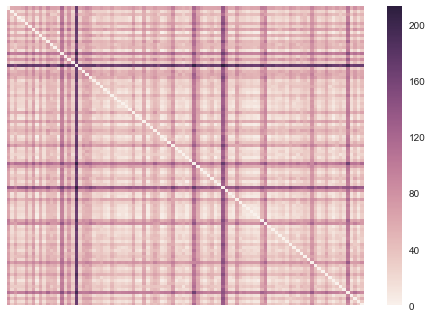

In [133]:
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set()
sns.heatmap(matrix_answer,xticklabels= False, yticklabels=False)

Provide an interpretation of the heatmap's results in the following markdown cell. **(5 pts)**

#My Interpretation
#The dark lines in the heatmap represent users who have a significantly different set of tags than his or her peers.
#Since I'm using hamming distance to construct the matrix and this heatmap, "different" can mean different number of 
#tags or types of tags.

#Also, the matrix and heatmap are both symmetric with regard to their diagonal. 

-----------------